In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from datetime import datetime,timezone
from matplotlib import pyplot as plt
import os
# %matplotlib widget

In [2]:
# Get a list of all files in the folder
files = os.listdir("EARBUDS_Labels")

# Extract the first three letters of the file names and create a list
persons = []

for file in files:
    if(file[0] == 'P'):
        persons.append(file[:3])

In [3]:
def plot(person, df):
    x_axis=np.arange(1,len(df)+1)
    y_axis=abs(df['ax'].values[:])+abs(df['az'].values[:])+abs(df['ay'].values[:])
    plt.figure(figsize=(10, 6))
    plt.scatter(x_axis,y_axis,c=df['Label'],cmap='viridis')
    plt.title(str(person))
    plt.show()

In [4]:
def getdf(person):
    return pd.read_csv(f"EARBUDS_Labels/{person}-imu-right.csv")

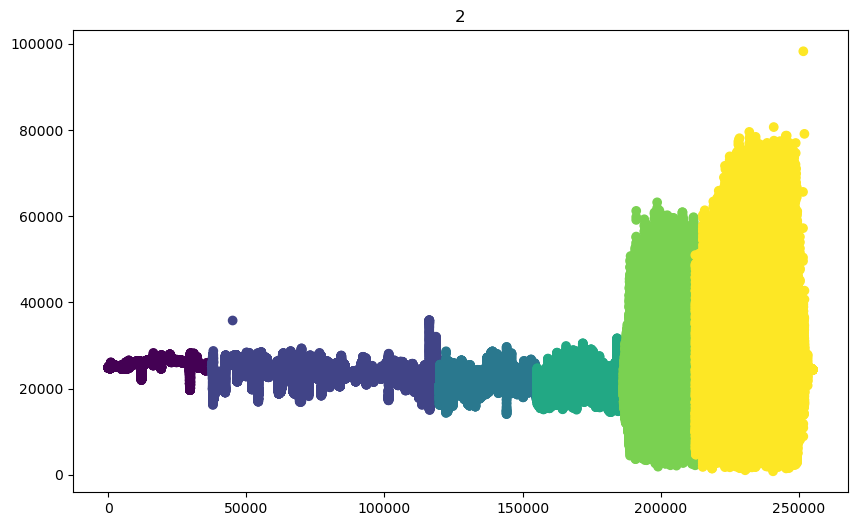

In [5]:
# Refining person 2
df_p2 = getdf('P02')
df_p2 = df_p2.iloc[:255000]
plot(2, df_p2)

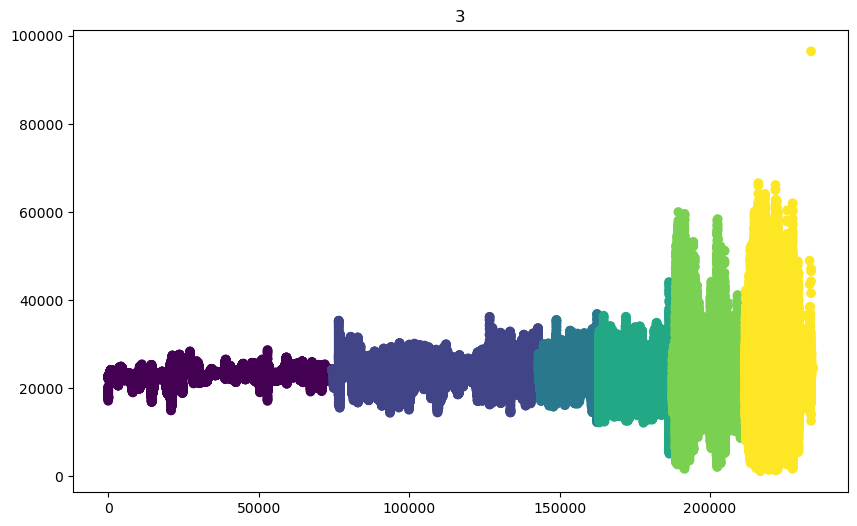

In [8]:
# Refining person 3
df_p3 = getdf('P03')
df_p3.loc[:74400, 'Label'] = 1
plot(3, df_p3)

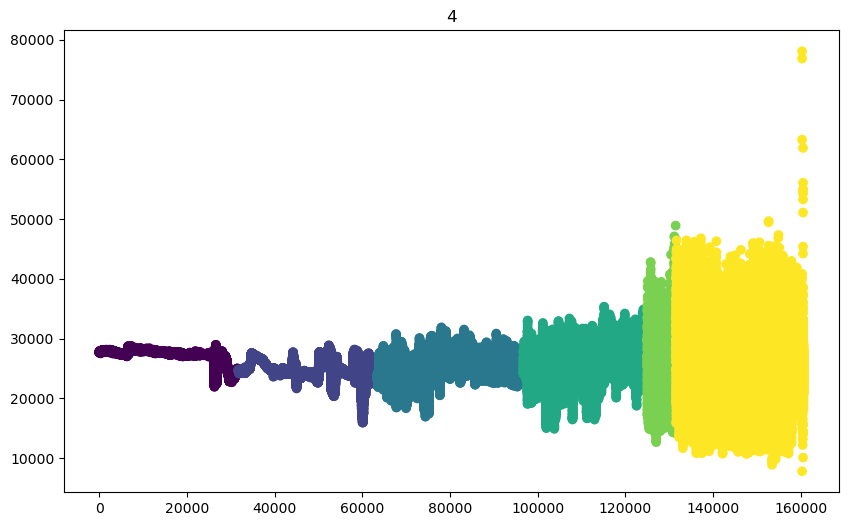

In [34]:
# Refining person 4
df_p4 = getdf('P04')
df_p4 = df_p4.iloc[6600:]
plot(4, df_p4)

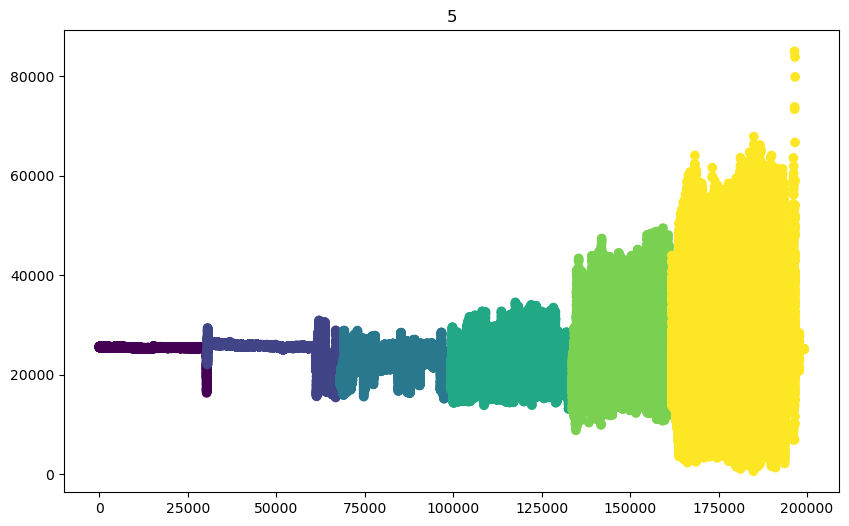

In [10]:
# Refining person 5
df_p5 = getdf('P05')
df_p5 = df_p5.iloc[:199100]
plot(5, df_p5)

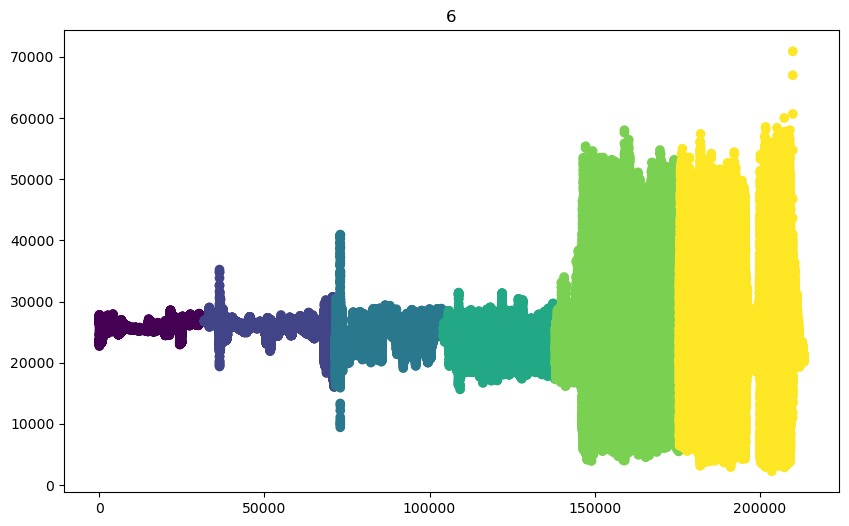

In [30]:
# Refining person 6
df_p6 = getdf('P06')
df_p6 = pd.concat([df_p6.iloc[:197900], df_p6.iloc[212500:]], ignore_index=True)
plot(6, df_p6)

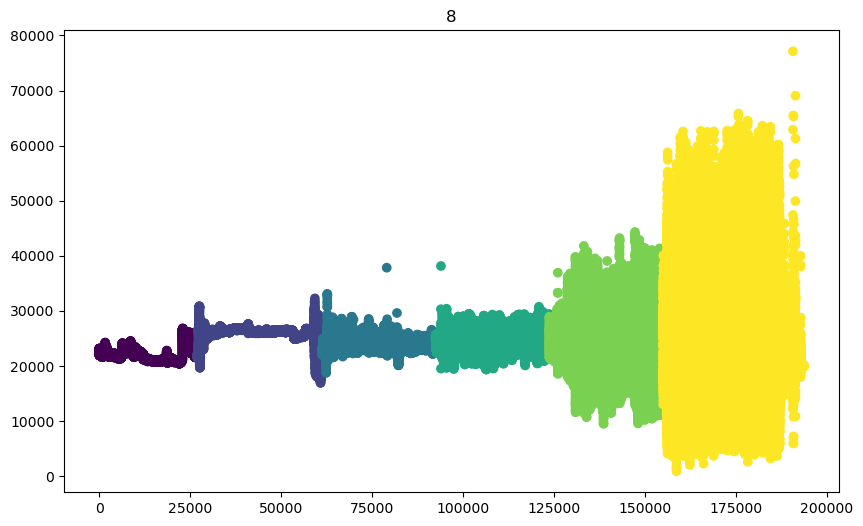

In [36]:
# Refining person 8
df_p8 = getdf('P08')
df_p8 = df_p8.iloc[4300:198000]
plot(8, df_p8)

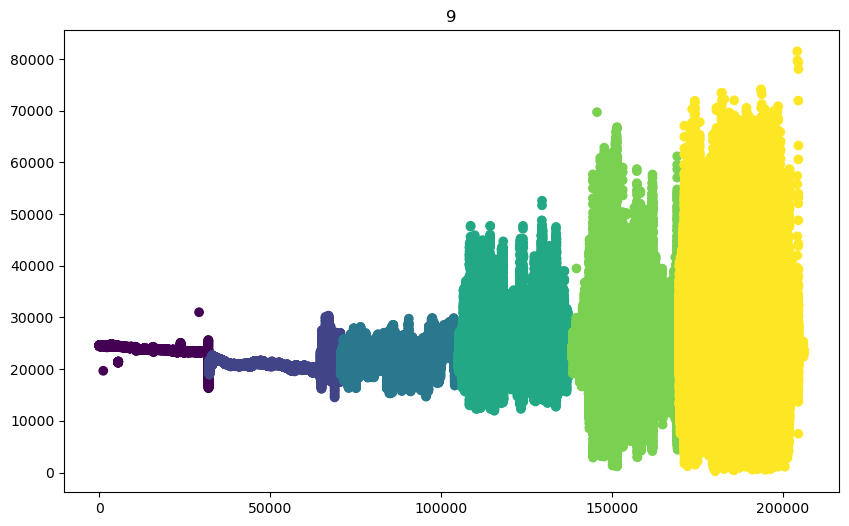

In [37]:
# Refining person 9
df_p9 = getdf('P09')
df_p9 = df_p9.iloc[:206200]
plot(9, df_p9)

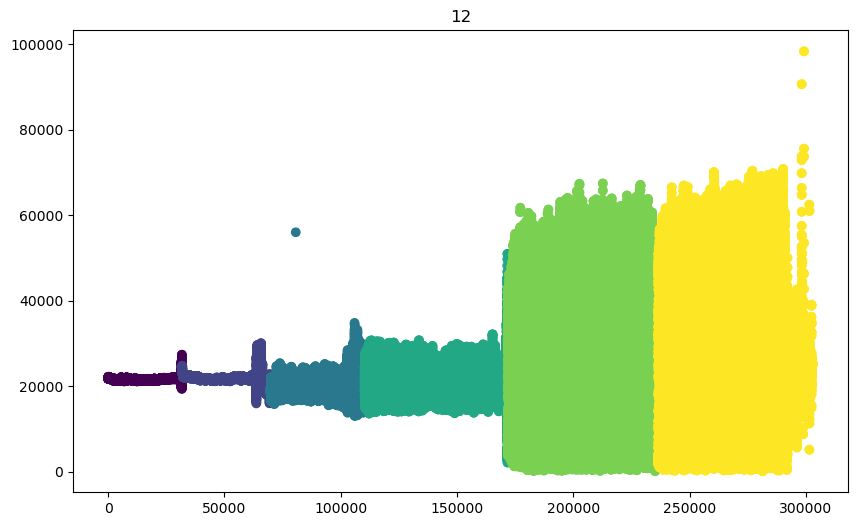

In [38]:
# Refining person 12
df_p12 = getdf('P12')
df_p12 = df_p12.iloc[:303000]
plot(12, df_p12)

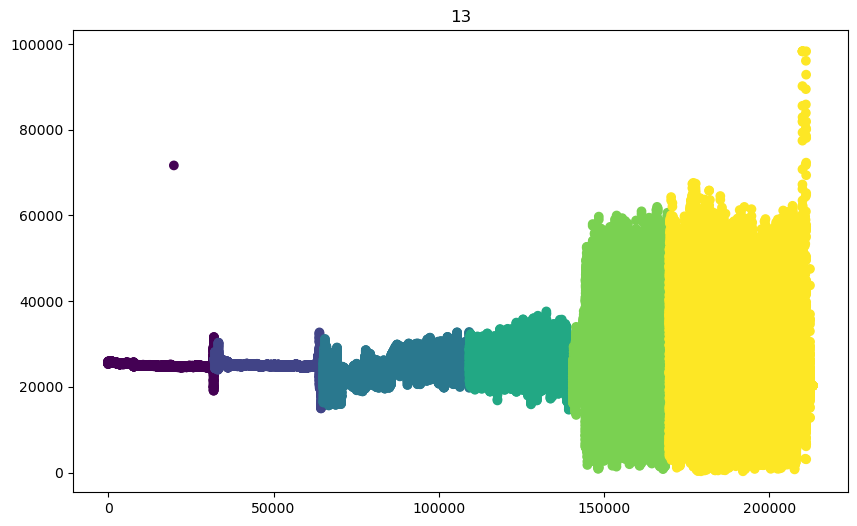

In [40]:
# Refining person 13
df_p13 = getdf('P13')
df_p13 = df_p13.iloc[:213100]
df_p13.loc[65000:80000, 'Label'] = 3
plot(13, df_p13)

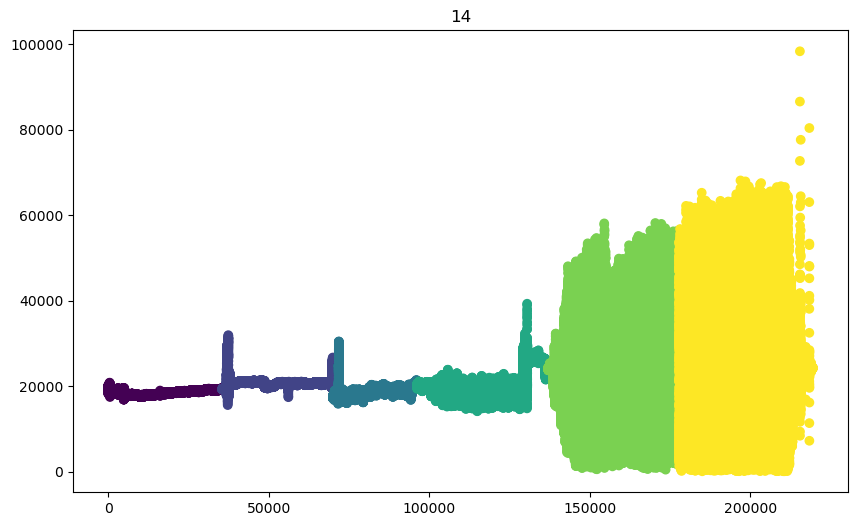

In [43]:
# Refining person 14
df_p14 = getdf('P14')
df_p14.loc[:35500, 'Label'] = 1
df_p14.loc[35500:70000, 'Label'] = 2
df_p14.loc[70000:104800, 'Label'] = 3
df_p14.loc[104800:145600, 'Label'] = 4
df_p14.loc[145600:186300, 'Label'] = 5
df_p14.loc[186300:, 'Label'] = 6
df_p14 = pd.concat([df_p14.iloc[:70000], df_p14.iloc[78600:]], ignore_index=True)
plot(14, df_p14)

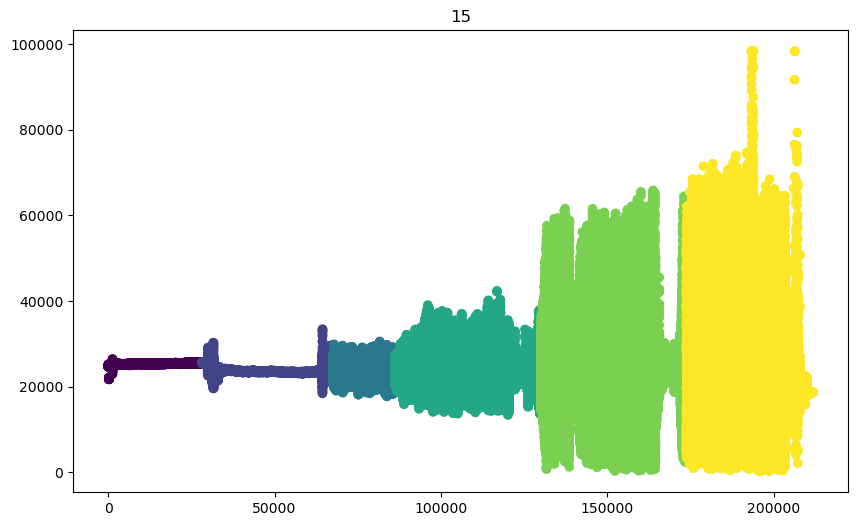

In [44]:
# Refining person 15
df_p15 = getdf('P15')
df_p15 = df_p15.iloc[7000:]
plot(15, df_p15)

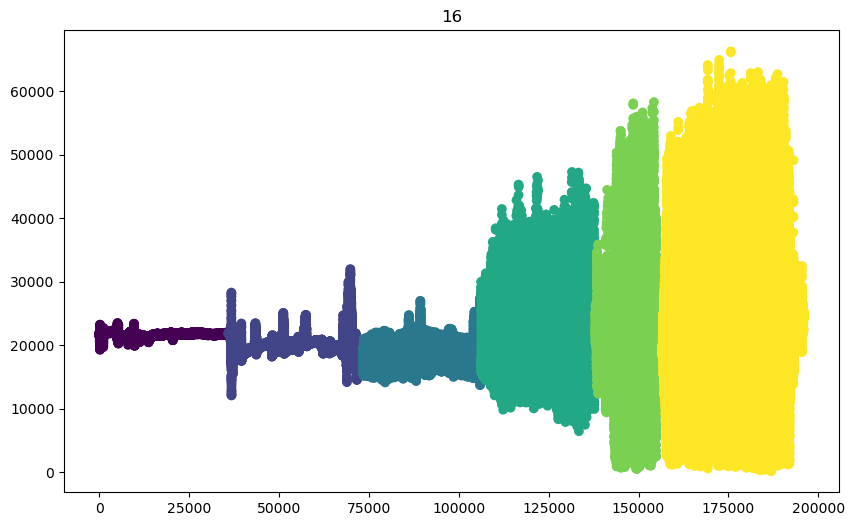

In [46]:
# Refining person 16
df_p16 = getdf('P16')
df_p16.loc[165400:, 'Label'] = 6
df_p16 = pd.concat([df_p16.iloc[:156600], df_p16.iloc[166600:206000]], ignore_index=True)
plot(16, df_p16)

In [47]:
# Exporting dataframes
def export(person, df):
    df.to_csv(f'refined_labels/{person}-imu-right.csv', index = False)

In [54]:
refined = ['01','07','10','11','17']
new_refined = [f"{num:02}" for num in range(1,18)]

# Remove elements from new_refined that are common with refined
new_refined = [x for x in new_refined if x not in refined]

dfs = {'02' : df_p2,
       '03' : df_p3,
       '04' : df_p4,
       '05' : df_p5,
       '06' : df_p6,
       '08' : df_p8,
       '09' : df_p9,
       '12' : df_p12,
       '13' : df_p13,
       '14' : df_p14,
       '15' : df_p15,
       '16' : df_p16,
      }

In [53]:
print(new_refined)

['02', '03', '04', '05', '06', '08', '09', '12', '13', '14', '15', '16']


In [55]:
for p in refined:
    export(f'P{p}', getdf(f'P{p}'))

for p in new_refined:
    export(f'P{p}', dfs[p])